In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [32]:
uber = pd.read_csv("Uber Request Data.csv")

In [33]:
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [34]:
uber.Status.unique()
uber.count

<bound method DataFrame.count of       Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

        Request timestamp       Drop timestamp  
0         11/7/2016 11:51      11/7/2016 13:00  
1         11/7/2016 17:57      11/7/2016 18:47  
2          12/7/2016 9:17       12/7/2016 9:58  
3         12/7

In [35]:
uber.isnull().values.any()

True

In [36]:
uber.isnull().values.sum()

6564

<AxesSubplot:>

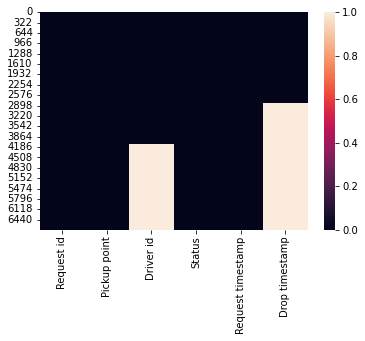

In [37]:
sns.heatmap(uber.isnull())

In [38]:
print(uber.isnull().sum())


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [39]:
(uber.isnull().sum()/uber.shape[0])*100
# Fiding out how many values are misiing which is essential 

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [40]:
# It's shown as Drop timsestamp having major missing values which is not good for the organization 


In [41]:
# CHANING DATE AND TIME FORMAT
uber['Request timestamp']= pd.to_datetime(uber['Request timestamp'],dayfirst=True)


In [42]:
uber['Drop timestamp']= pd.to_datetime(uber['Drop timestamp'],dayfirst=True)
uber


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [43]:
uber['Request timestamp'][4].time()

datetime.time(8, 33, 16)

In [44]:
uber["Requested hours"]= uber['Request timestamp'].dt.hour
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requested hours
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23


In [45]:
uber["Requested day"]= uber['Request timestamp'].dt.day
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requested hours,Requested day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [46]:
print(' Unique values for requested days', uber['Requested day'].unique())

 Unique values for requested days [11 12 13 14 15]


In [47]:
uber.nunique()

Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
Requested hours        24
Requested day           5
dtype: int64

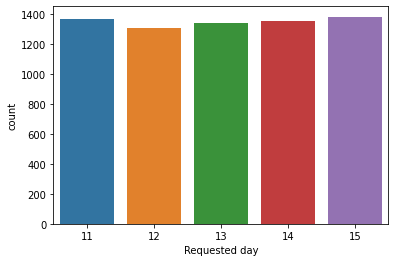

In [50]:
sns.countplot(x="Requested day",data=uber)
plt.show()

In [51]:
print(uber['Requested day'].value_counts())

15    1381
11    1367
14    1353
13    1337
12    1307
Name: Requested day, dtype: int64


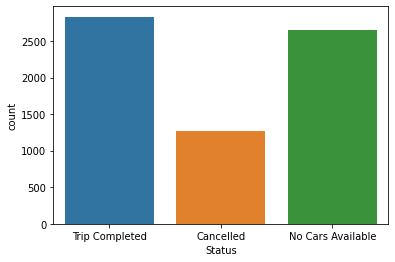

In [52]:
sns.countplot(x="Status",data=uber)
plt.show()

In [54]:
print(uber['Status'].value_counts())

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64


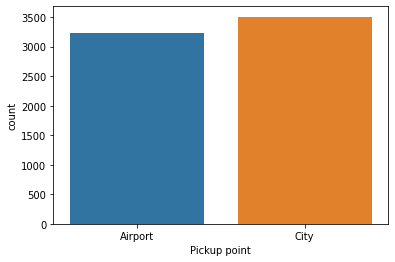

City       3507
Airport    3238
Name: Pickup point, dtype: int64


In [55]:
# Plot of values from Pickup point
sns.countplot(x="Pickup point",data=uber)
plt.show()
# check the unique values of Pickup point
print(uber["Pickup point"].value_counts())

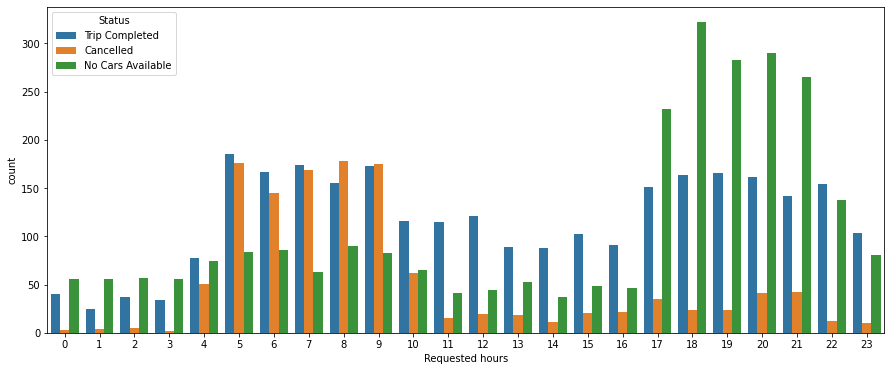

In [57]:
plt.figure(figsize=(15,6))
sns.countplot(data=uber,x='Requested hours', hue='Status')
plt.show()

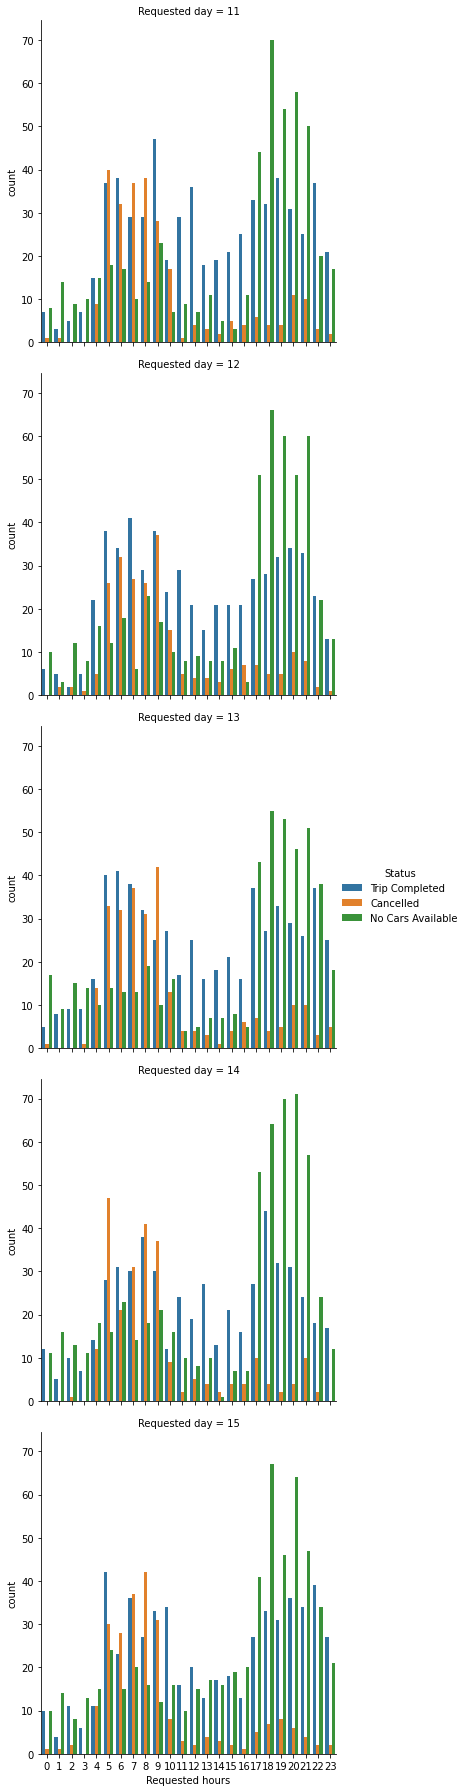

In [60]:
# chceking how many cars are available 

sns.factorplot(data=uber, x="Requested hours", row="Requested day", hue="Status",kind="count")
plt.show()

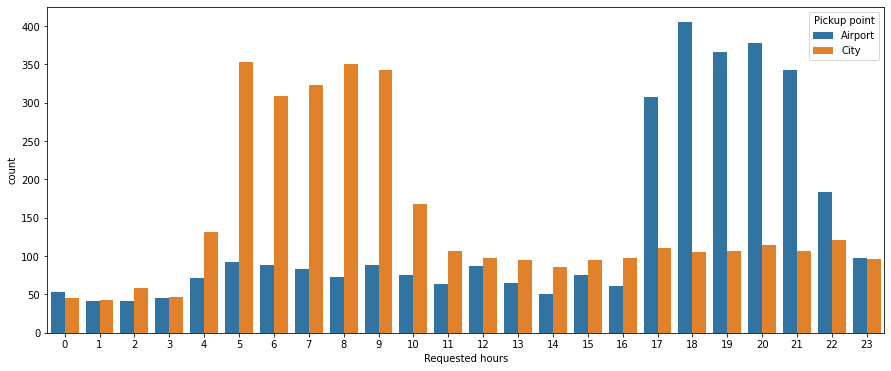

In [62]:
plt.figure(figsize=(15,6))
sns.countplot(data=uber,x='Requested hours', hue='Pickup point')
plt.show()

In [71]:
uber['Time Slot']=0
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requested hours,Requested day,Time slot,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0,0
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,0,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,0,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,0,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,0,0


In [72]:
for x,y in enumerate(uber['Requested hours']):
    if y<5:
        uber['Time Slot'][x] = 'Pre_Morning'
    elif 5 <= y < 10:
        uber['Time Slot'][x] = "Morning_Rush"
    elif 10 <= y < 17:
        uber['Time Slot'][x] = "Day_Time"
    elif 17 <= y < 22:
        uber['Time Slot'][x] = "Evening_Rush"
    else:
        uber['Time Slot'][x] = "Late_Night"

In [73]:
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requested hours,Requested day,Time slot,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0,Morning_Rush
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,0,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,0,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,0,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,0,Late_Night


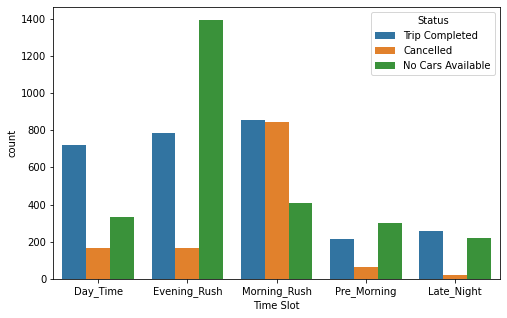

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time Slot, dtype: int64


In [77]:
# Analysing Time zone using Time slot variable

plt.figure(figsize=(8,5))
sns.countplot(data=uber, x='Time Slot', hue="Status")
plt.show()
print(uber['Time Slot'].value_counts())
              

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

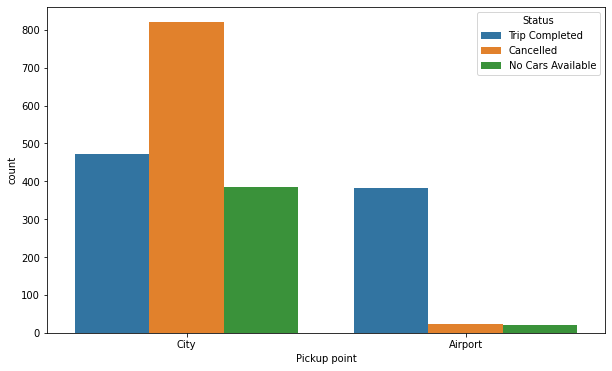

In [82]:
df_morning_rush = uber[uber['Time Slot']=='Morning_Rush']
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)

In [85]:
#CHECKING HOW MANY TRIPS ARE CANCELLED FROM AIRPORT
df_airport_cancelled = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]
df_airport_cancelled.shape[0]


23

In [87]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & 
                                      (df_morning_rush["Status"]=="Cancelled")]
df_city_cancelled.shape[0]

820

In [88]:
df_morning_rush


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requested hours,Requested day,Time slot,Time Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,0,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,0,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,0,Morning_Rush
...,...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,0,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,0,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,0,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,0,Morning_Rush


<AxesSubplot:xlabel='Pickup point', ylabel='count'>

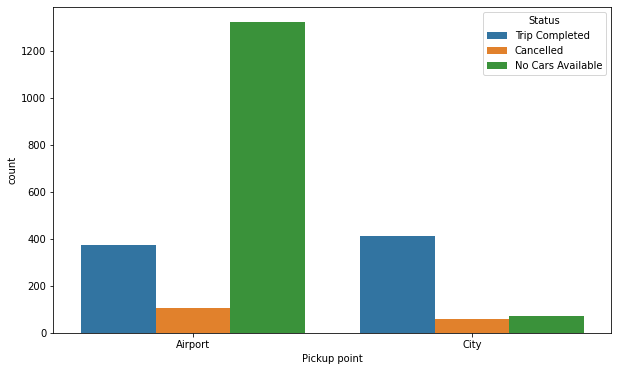

In [90]:
df_evening_rush=uber[uber['Time Slot']=='Evening_Rush']
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)

In [91]:
# Check cancel Trips from city
df_city_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]
df_city_cancelled.shape[0]

60

In [92]:
# Check cancel Trips from airport
df_airport_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")]
df_airport_cancelled.shape[0]

106

In [93]:
total_city_ER = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City")].shape[0]
completed_city_ER = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]


In [94]:
completed_city_ER

411

In [95]:
total_city_ER

542

In [96]:
print('City Completion rate: ', (completed_city_ER/total_city_ER)*100)


City Completion rate:  75.83025830258303


In [97]:
total_Airport_ER = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0]
completed_Airport_ER = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]
print('Airport Completion rate: ', (completed_Airport_ER/total_Airport_ER)*100)

Airport Completion rate:  20.72222222222222
